# Marketing Analytics

## Importing from another file functions I created to speed up analysis, visualization, and predictive modeling 

In [2]:
%run "C:/Users/ssiva/Documents_Karthik/Machine_Learning/Machine_Learning_Algorithms/Karthik_Machine_Learning_Algorithms.ipynb"

Order of functions for Machine Learning:

1. impute_cols

2. Optional: remove_high_corr_cols and/or combine_dummy_variable_columns

3. convert_cat

4. find_cols_to_ignore (to be used only with normalize_df function)

5. shuffled_split_dfs / split_dfs (returns a list of two dataframes, train_df and test_df)

6. normalize (need to do for both train_df and test_df separately so there is no data leakage from test_df into train_df)

7. stoch_grad_desc (input train_df as the dataset parameter)

8. make_predictions (input test_df as the dataset parameter)

9. check_accuracy
Available functions:


create_random_df(model,nrows,ncols,nclasses,target_multiplier = 1),

find_cols_to_ignore(df,thresh_cat = 0.02,cols_to_ignore = None),

impute_cols(df,k=None,null_cols = 'auto_select',thresh_null_cat = 0.02,cols_to_ignore = None),

num_unique_values_in_cols(df,cols = None),

remove_outliers(df_in,outlier_cols = None,thresh_cat = 0.02,remove = True),

def remove_high_corr_cols(dataframe,cols_to_use = N

## Context
### this is a use-case example of a grocery retail company who is planning on rolling out a new marketing campaign and have collected data from a pilot campaign

## Objectives
### Analyze customers and purchasing behavior to identify trends
### Make improvements on the sixth and upcoming campaign given data on a pilot campaign done before the upcoming campaign’s full implementation

Data Source: https://github.com/nailson/ifood-data-business-analyst-test/blob/master/iFood%20Data%20Analyst%20Case.pdf

In [3]:
data = pd.read_csv(r'ifood_df.csv')

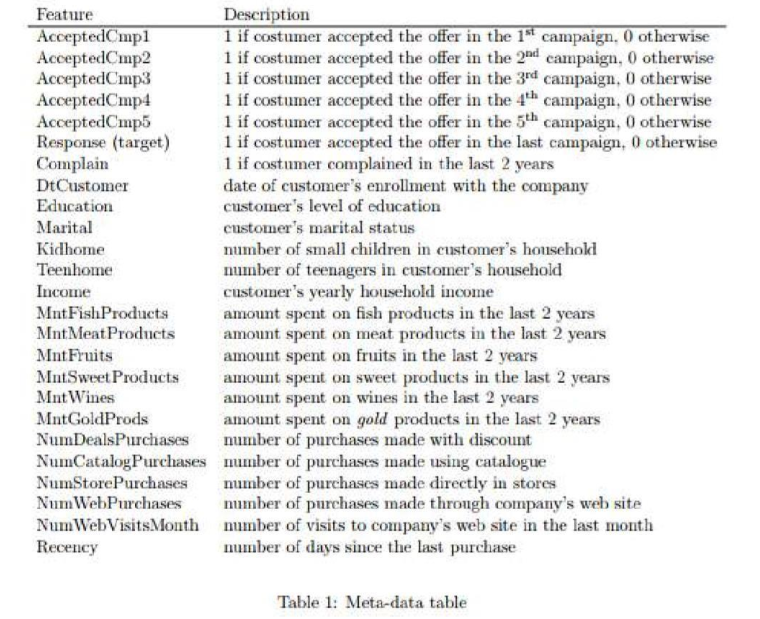

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
Income                  2205 non-null float64
Kidhome                 2205 non-null int64
Teenhome                2205 non-null int64
Recency                 2205 non-null int64
MntWines                2205 non-null int64
MntFruits               2205 non-null int64
MntMeatProducts         2205 non-null int64
MntFishProducts         2205 non-null int64
MntSweetProducts        2205 non-null int64
MntGoldProds            2205 non-null int64
NumDealsPurchases       2205 non-null int64
NumWebPurchases         2205 non-null int64
NumCatalogPurchases     2205 non-null int64
NumStorePurchases       2205 non-null int64
NumWebVisitsMonth       2205 non-null int64
AcceptedCmp3            2205 non-null int64
AcceptedCmp4            2205 non-null int64
AcceptedCmp5            2205 non-null int64
AcceptedCmp1            2205 non-null int64
AcceptedCmp2            2205 non-null int64
Complain   

In [5]:
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


In [6]:
#### Renaming 'Response' to 'AcceptedCmp6' since it is a boolean variable column which tells whether customers accepted the 6th and latest campaign.
data.rename({'Response':'AcceptedCmp6'},axis = 1,inplace = True)

In [7]:
#### Renaming 'education_2n Cycle' to 'education_Associate'
data.rename({'education_2n Cycle':'education_Associate'},axis = 1,inplace = True)

In [8]:
#### Renaming 'education_Graduation' to 'education_Bachelor' 
data.rename({'education_Graduation':'education_Bachelor'},axis = 1,inplace = True)

#### I am creating lists that group the column names

In [9]:
### Creating a list containing columns that show how much money in dollars customers spent on each category. 
amount_cols = [col for col in data.columns if col[:3] == 'Mnt']


### Creating a list containing columns that show integer values representing a number of purchases or visits
num_cols = [col for col in data.columns if col[:3] == 'Num']

### Creating a list containing columns that show amount purchased for each of the five main product categories: wines, fruits, meats, fish, and sweets
product_cols = amount_cols.copy()
product_cols.remove('MntTotal')
product_cols.remove('MntRegularProds')
product_cols.remove('MntGoldProds')

### Creating a list containing columns that show amount purchased for each of the two other product category types: Regular and Gold
reg_or_gold_cols = ['MntGoldProds', 'MntRegularProds']

### Creating a list containing columns that show integer values representing a number of purchases for each channel
chnl_sales_cols = num_cols.copy()

### Removing columns from chnl_sales_cols that are not channels
chnl_sales_cols.remove('NumWebVisitsMonth')
chnl_sales_cols.remove('NumDealsPurchases')

### Creating two list which contain boolean columns displaying whether a customer accepted offer from the respective campaigns. 
### These columnsinclude  previous campaign columns, the current campaign column ("AcceptedCmp6") and an overall previous campaign 
### column (only shows total campaign acceptance for previous campaigns) 
camp_acc_cols = [col for col in data.columns if col[:8] == 'Accepted']
prev_camp_acc_cols = camp_acc_cols.copy()
prev_camp_acc_cols.remove('AcceptedCmp6')

### Creating a list containing marital status columns (each column contains a boolean value)
marital_cols = [col for col in data.columns if col[:7] == 'marital']

### Creating a list containing education status columns (booleans)
education_cols = [col for col in data.columns if col[:9] == 'education']

### Creating a list containing money columns (cost and revenue)
money_cols = [col for col in data.columns if col[0] == 'Z']

### Creating a list containing names of other customer information columns
other_cust_cols = ['Age','CustomerDays']

### Now, I need to also create category columns that aggregates the information stored in the boolean columns. This is so that I can create visualizations more easily for categorical variables. First, I am checking if there are

In [10]:
data[education_cols].sum(axis = 1).value_counts()

1    2205
dtype: int64

In [11]:
data[marital_cols].sum(axis = 1).value_counts()

1    2205
dtype: int64

In [12]:
data[camp_acc_cols].describe()

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,AcceptedCmp6,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.00000
mean,0.073923,0.074376,0.073016,0.064399,0.013605,0.15102,0.29932
std,0.261705,0.262442,0.260222,0.245518,0.115872,0.35815,0.68044
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,4.00000


### Creating a total campaign acceptance column which includes the 'Response' column, which is for the 6th and most recent campaign.

In [13]:
prev_camp_acc_cols.sort()
camp_acc_cols.sort()

In [14]:
prev_camp_acc_cols, camp_acc_cols

(['AcceptedCmp1',
  'AcceptedCmp2',
  'AcceptedCmp3',
  'AcceptedCmp4',
  'AcceptedCmp5',
  'AcceptedCmpOverall'],
 ['AcceptedCmp1',
  'AcceptedCmp2',
  'AcceptedCmp3',
  'AcceptedCmp4',
  'AcceptedCmp5',
  'AcceptedCmp6',
  'AcceptedCmpOverall'])

In [15]:
data['AcceptedCmpTotal'] = data[camp_acc_cols[:-1]].apply(lambda cols: sum(cols), axis = 1)

In [16]:
data['AcceptedCmpTotal'].describe()

count    2205.000000
mean        0.450340
std         0.894075
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: AcceptedCmpTotal, dtype: float64

In [17]:
camp_acc_cols.append('AcceptedCmpTotal')

### Out of the categorical column lists, only education_cols and marital_cols contain groupings of dummy variable columns.

In [18]:
data = combine_dummy_variable_columns(data,education_cols,'Education_Level',True,'education_')
data = combine_dummy_variable_columns(data,marital_cols,'Marital_Status',True,'marital_')

In [19]:
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,AcceptedCmp6,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_Associate,education_Basic,education_Bachelor,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,AcceptedCmpTotal,Education_Level,Marital_Status
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0,1,Bachelor,Single
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0,0,Bachelor,Single
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0,0,Bachelor,Together
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0,0,Bachelor,Together
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0,0,PhD,Married


In [20]:
data.groupby('Education_Level').mean().reset_index()

,Education_Level,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,AcceptedCmp6,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_Associate,education_Basic,education_Bachelor,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,AcceptedCmpTotal
0,Associate,47625.333333,0.474747,0.409091,48.383838,202.757576,29.626263,136.378788,48.454545,35.055556,47.217172,2.272727,3.787879,2.373737,5.595960,5.469697,0.075758,0.045455,0.050505,0.070707,0.010101,0.015152,3.0,11.0,0.111111,47.207071,2520.111111,0.111111,0.404040,0.176768,0.282828,0.025253,1.0,0.0,0.0,0.0,0.0,452.272727,405.055556,0.252525,0.363636
1,Bachelor,51984.008086,0.441150,0.493261,49.909254,285.804133,30.930818,179.312668,43.523810,31.367475,50.807727,2.314465,4.123989,2.719677,5.854447,5.292902,0.070081,0.070979,0.077269,0.071878,0.014376,0.012579,3.0,11.0,0.136568,50.381851,2518.674753,0.106020,0.385445,0.222821,0.254268,0.031447,0.0,0.0,1.0,0.0,0.0,570.938904,520.131177,0.304582,0.441150
2,Basic,20306.259259,0.629630,0.092593,48.444444,7.240741,11.111111,11.444444,17.055556,12.111111,22.833333,1.796296,1.888889,0.481481,2.851852,6.870370,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.037037,42.537037,2587.203704,0.018519,0.370370,0.333333,0.259259,0.018519,0.0,1.0,0.0,0.0,0.0,58.962963,36.129630,0.111111,0.148148
3,Master,52629.579670,0.456044,0.535714,47.346154,333.788462,21.431319,163.343407,31.574176,20.865385,40.277473,2.431319,4.043956,2.552198,5.901099,5.217033,0.065934,0.085165,0.074176,0.049451,0.005495,0.005495,3.0,11.0,0.153846,53.063187,2497.571429,0.101648,0.379121,0.211538,0.277473,0.030220,0.0,0.0,0.0,1.0,0.0,571.002747,530.725275,0.280220,0.434066
4,PhD,55220.581933,0.399160,0.602941,48.500000,409.573529,20.012605,163.571429,26.897059,20.411765,32.256303,2.319328,4.470588,2.901261,6.123950,5.302521,0.084034,0.094538,0.079832,0.063025,0.021008,0.002101,3.0,11.0,0.212185,53.848739,2498.848739,0.109244,0.392857,0.207983,0.239496,0.050420,0.0,0.0,0.0,0.0,1.0,640.466387,608.210084,0.342437,0.554622


In [21]:
amount_cols

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'MntTotal',
 'MntRegularProds']

In [22]:
data[amount_cols].describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal,MntRegularProds
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,562.764626,518.707483
std,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,575.936911,553.847248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,56.000000,42.000000
50%,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,343.000000,288.000000
75%,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,964.000000,884.000000
max,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,2491.000000,2458.000000


# Exploratory Data Analysis

## Revenue by Product Category

### First, I need to transpose the data and aggregate the revenue by product category

In [23]:
prod_cat_df = pd.DataFrame(data = data[product_cols].transpose().sum(axis = 1).reset_index().values,columns = ['Product_Category','Revenue_in_Dollars'])

In [24]:
prod_cat_df

,Product_Category,Revenue_in_Dollars
0,MntWines,675093
1,MntFruits,58219
2,MntMeatProducts,364513
3,MntFishProducts,83253
4,MntSweetProducts,59818


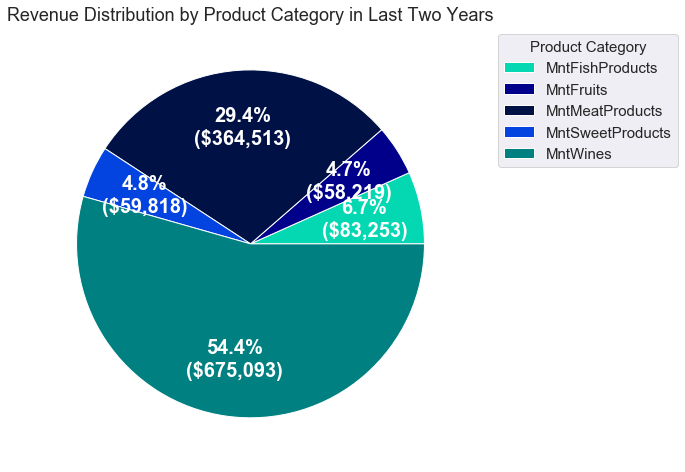

In [25]:
create_pie_plot(dataset=prod_cat_df,ind_col = 'Product_Category', dep_col = 'Revenue_in_Dollars', is_dollar_value = True,agg_func_name='sum', annotate_percentages= True, plot_title = 'Revenue Distribution by Product Category in Last Two Years', legend_title = "Product Category")

In [26]:
prod_cat_2_df = pd.DataFrame(data = data[reg_or_gold_cols].transpose().sum(axis = 1).reset_index().values,columns = ['Product_Category','Revenue_in_Dollars'])

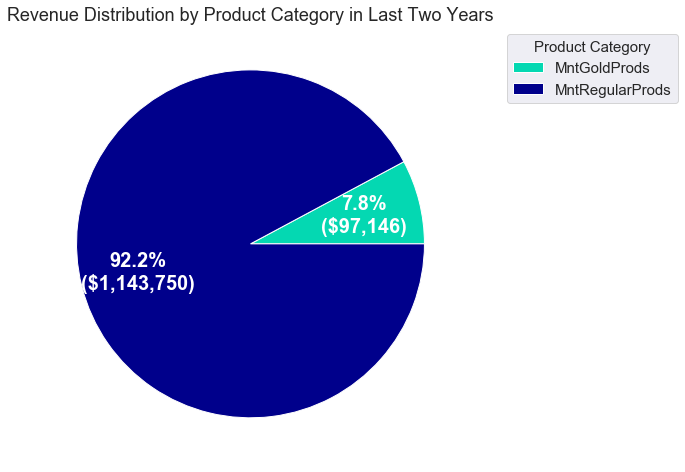

In [27]:
create_pie_plot(dataset=prod_cat_2_df,ind_col = 'Product_Category', dep_col = 'Revenue_in_Dollars', is_dollar_value = True,agg_func_name='sum', annotate_percentages= True, plot_title = 'Revenue Distribution by Product Category in Last Two Years', legend_title = "Product Category")

## Customer Insights and Breakdown

## Money Customers Spent in Last Two Years For Each Product Category by Education Level

In [28]:
education_level_order_list = ['Basic','Associate','Bachelor','Master','PhD']

#### Furthering dividing data by two product category divisions

### Distribution of Customers and Total Revenue in Last Two Years by Education Level

In [29]:
data.groupby('Education_Level').count()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,AcceptedCmp6,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_Associate,education_Basic,education_Bachelor,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,AcceptedCmpTotal,Marital_Status
Education_Level,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Associate,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198
Bachelor,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113
Basic,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54
Master,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364
PhD,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476


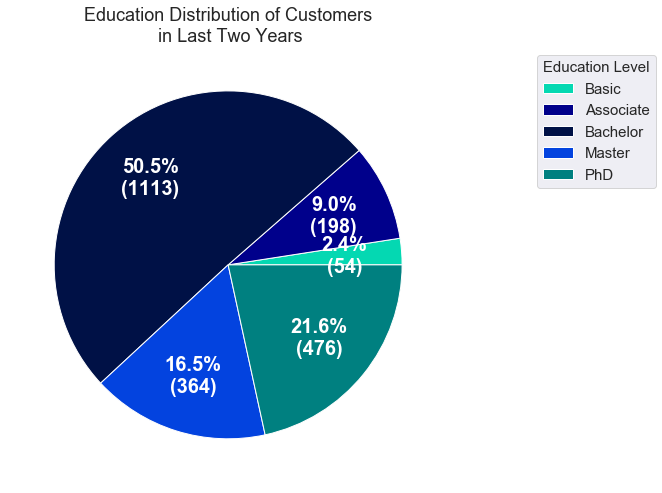

In [30]:
create_pie_plot(data,ind_col = 'Education_Level', ind_cols_order = education_level_order_list, annotate_percentages= True, plot_title = 'Education Distribution of Customers\n in Last Two Years', legend_title = "Education Level")

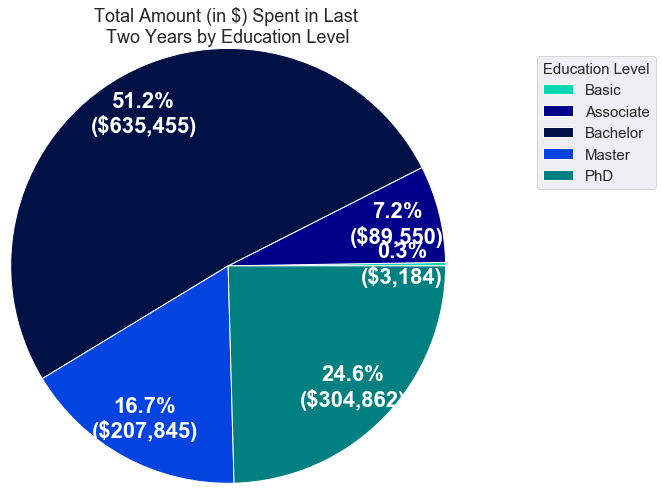

In [31]:
create_pie_plot(data,ind_col = 'Education_Level',dep_col = 'MntTotal', ind_cols_order = education_level_order_list, agg_func_name='sum', annotate_percentages= True, is_dollar_value=True, pie_radius = 1.25, pct_dist_from_cent = 0.8, label_dist_from_cent = 0.8, annot_fsize = 22, plot_title = 'Total Amount (in $) Spent in Last \nTwo Years by Education Level', legend_title = "Education Level")

### Money Spent on All Categories Combined in the Last Two Years by Marital Status

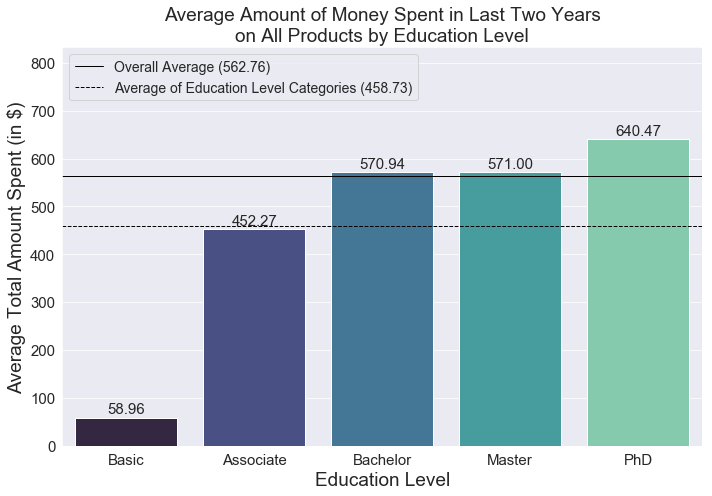

In [32]:
barplot_absolute(dataset=data,dep_col = 'MntTotal',ind_col = 'Education_Level',hue_col = None, is_aggregated_bool= False, aggregate_func= 'mean', magnitude = None, ind_cols_order = education_level_order_list, plot_palette = 'mako', plt_figsize_x = 10, plt_figsize_y = 7, ymin = 0, y_max_multiplier = 1.3, num_decimals = 2, annotate_percentages= False,plot_title_text = 'Average Amount of Money Spent in Last Two Years\non All Products by Education Level', plot_title_fsize = 19, xlabel_text = 'Education Level', xlabel_fsize = 19, ylabel_text = "Average Total Amount Spent (in $)", ylabel_fsize = 19, x_tick_fsize = 15, y_tick_fsize = 15, xtick_rotation = 0, ytick_rotation = 0, annot_fsize = 15, legend_fsize = 14)

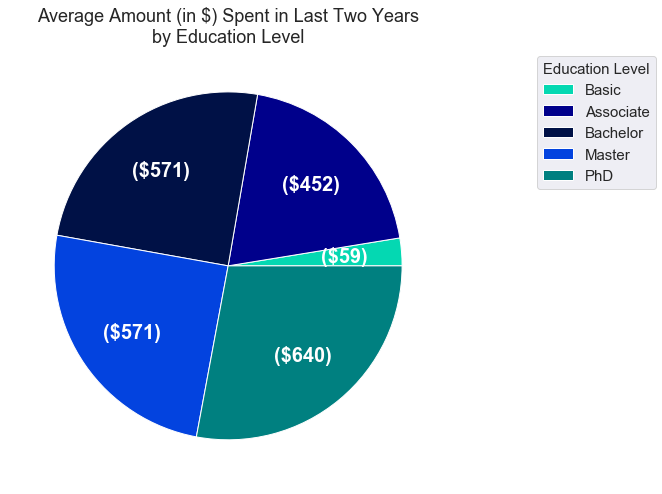

In [33]:
create_pie_plot(data,ind_col = 'Education_Level', dep_col = 'MntTotal', ind_cols_order = education_level_order_list, agg_func_name='mean', annotate_percentages=False, is_dollar_value=True, plot_title = 'Average Amount (in $) Spent in Last Two Years\nby Education Level', legend_title = "Education Level")

### Amount of Money Customer Spent in Last Two Years for Each Product by Education Level

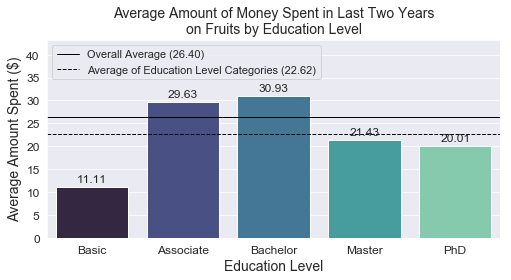

In [34]:
barplot_absolute(dataset=data,dep_col = 'MntFruits',ind_col = 'Education_Level',hue_col = None, is_aggregated_bool= False, aggregate_func= 'mean', magnitude = None,ind_cols_order = education_level_order_list, plot_palette = 'mako',plt_figsize_x = 7.2, plt_figsize_y = 4, ymin = 0,y_max_multiplier = 1.4,num_decimals = 2, plot_title_text = 'Average Amount of Money Spent in Last Two Years\non Fruits by Education Level', plot_title_fsize = 14, xlabel_text = 'Education Level', xlabel_fsize = 14, ylabel_text = 'Average Amount Spent ($)', ylabel_fsize = 14, x_tick_fsize = 12, y_tick_fsize = 12, xtick_rotation = 0, ytick_rotation = 0, annot_fsize = 12, legend_fsize = 11)

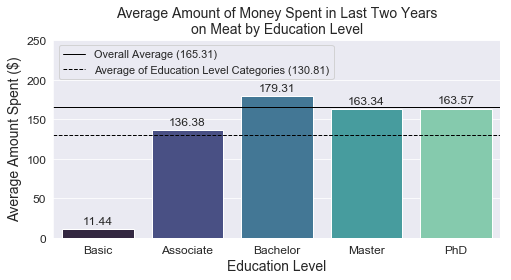

In [35]:
barplot_absolute(dataset=data,dep_col = 'MntMeatProducts',ind_col = 'Education_Level',hue_col = None, is_aggregated_bool= False, aggregate_func= 'mean', magnitude = None,ind_cols_order = education_level_order_list, plot_palette = 'mako',plt_figsize_x = 7.2, plt_figsize_y = 4, ymin = 0,y_max_multiplier = 1.4,num_decimals = 2, plot_title_text = 'Average Amount of Money Spent in Last Two Years\non Meat by Education Level', plot_title_fsize = 14, xlabel_text = 'Education Level', xlabel_fsize = 14, ylabel_text = 'Average Amount Spent ($)', ylabel_fsize = 14, x_tick_fsize = 12, y_tick_fsize = 12, xtick_rotation = 0, ytick_rotation = 0, annot_fsize = 12, legend_fsize = 11)

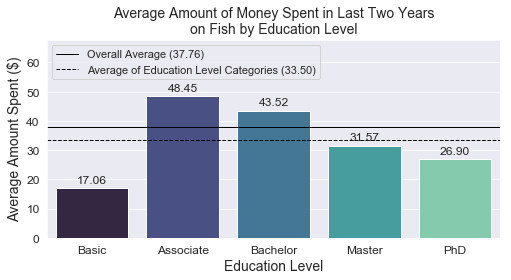

In [36]:
barplot_absolute(dataset=data,dep_col = 'MntFishProducts',ind_col = 'Education_Level',hue_col = None, is_aggregated_bool= False, aggregate_func= 'mean', magnitude = None,ind_cols_order = education_level_order_list, plot_palette = 'mako',plt_figsize_x = 7.2, plt_figsize_y = 4, ymin = 0, y_max_multiplier = 1.4,num_decimals = 2, plot_title_text = 'Average Amount of Money Spent in Last Two Years\non Fish by Education Level', plot_title_fsize = 14, xlabel_text = 'Education Level', xlabel_fsize = 14, ylabel_text = 'Average Amount Spent ($)', ylabel_fsize = 14, x_tick_fsize = 12, y_tick_fsize = 12, xtick_rotation = 0, ytick_rotation = 0, annot_fsize = 12, legend_fsize = 11)

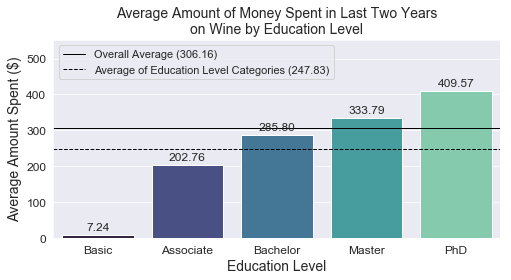

In [37]:
barplot_absolute(dataset=data,dep_col = 'MntWines',ind_col = 'Education_Level',hue_col = None, is_aggregated_bool= False, aggregate_func= 'mean', magnitude = None,ind_cols_order = education_level_order_list, plot_palette = 'mako',plt_figsize_x = 7.2, plt_figsize_y = 4, ymin = 0,y_max_multiplier = 1.35,num_decimals = 2, plot_title_text = 'Average Amount of Money Spent in Last Two Years\non Wine by Education Level', plot_title_fsize = 14, xlabel_text = 'Education Level', xlabel_fsize = 14, ylabel_text = 'Average Amount Spent ($)', ylabel_fsize = 14, x_tick_fsize = 12, y_tick_fsize = 12, xtick_rotation = 0, ytick_rotation = 0, annot_fsize = 12, legend_fsize = 11)

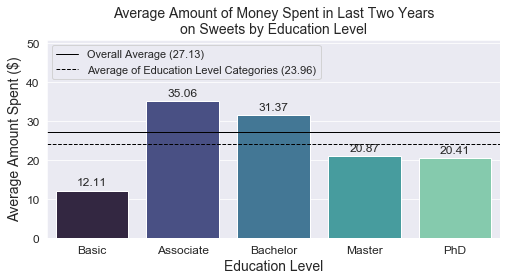

In [38]:
barplot_absolute(dataset=data,dep_col = 'MntSweetProducts',ind_col = 'Education_Level',hue_col = None, is_aggregated_bool= False, aggregate_func= 'mean', magnitude = None,ind_cols_order = education_level_order_list, plot_palette = 'mako',plt_figsize_x = 7.2, plt_figsize_y = 4, ymin = 0,y_max_multiplier = 1.45,num_decimals = 2, plot_title_text = 'Average Amount of Money Spent in Last Two Years\non Sweets by Education Level', plot_title_fsize = 14, xlabel_text = 'Education Level', xlabel_fsize = 14, ylabel_text = "Average Amount Spent ($)", ylabel_fsize = 14, x_tick_fsize = 12, y_tick_fsize = 12, xtick_rotation = 0, ytick_rotation = 0, annot_fsize = 12, legend_fsize = 11)

## Money Customers Spent in Last Two Years For Each Product Category by Marital Status

In [39]:
marital_status_order_list = ['Single','Together','Married','Divorced','Widow']

### Distribution of Customers and Total Revenue in Last Two Years by Marital Status

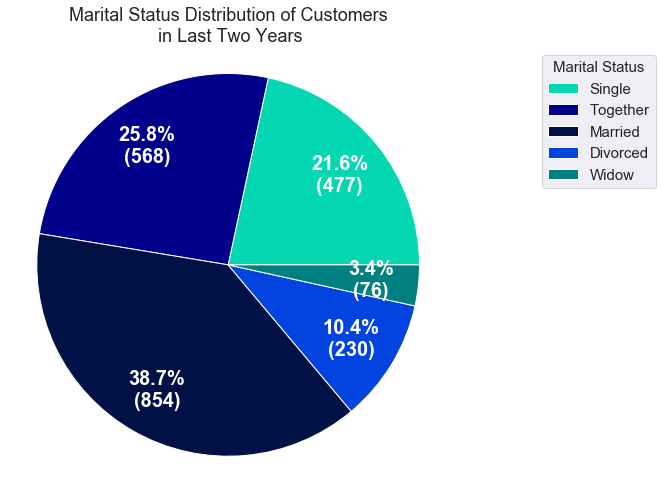

In [40]:
create_pie_plot(data,ind_col = 'Marital_Status', ind_cols_order = marital_status_order_list, annotate_percentages= True, pie_radius = 1.1, pct_dist_from_cent = 0.75, label_dist_from_cent = 0.67, plot_title = 'Marital Status Distribution of Customers\n in Last Two Years', legend_title = "Marital Status")

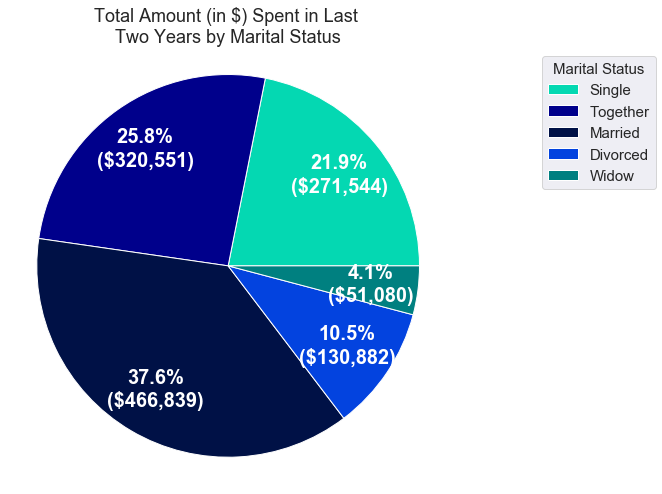

In [41]:
create_pie_plot(data,ind_col = 'Marital_Status',dep_col = 'MntTotal', ind_cols_order = marital_status_order_list, agg_func_name='sum', annotate_percentages= True, is_dollar_value=True, pie_radius = 1.1, pct_dist_from_cent = 0.75, label_dist_from_cent = 0.67, plot_title = 'Total Amount (in $) Spent in Last \nTwo Years by Marital Status', legend_title = "Marital Status")

### Money Spent on All Categories Combined in the Last Two Years by Marital Status

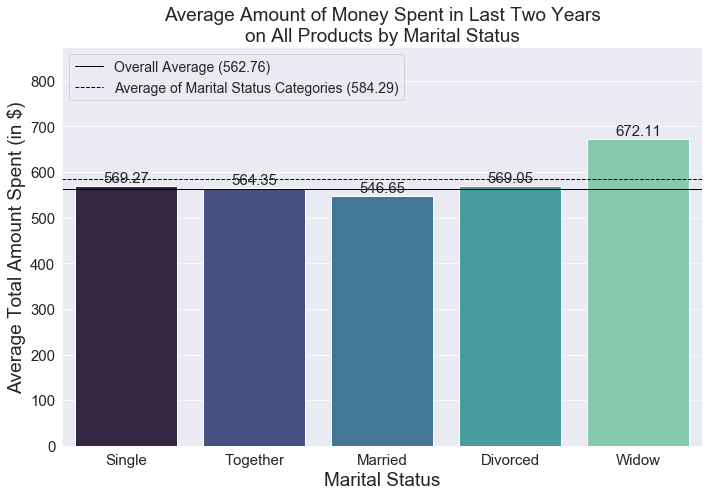

In [42]:
barplot_absolute(dataset=data,dep_col = 'MntTotal',ind_col = 'Marital_Status',hue_col = None, is_aggregated_bool= False, aggregate_func= 'mean', magnitude = None,ind_cols_order = marital_status_order_list, plot_palette = 'mako', plt_figsize_x = 10, plt_figsize_y = 7, ymin = 0,y_max_multiplier = 1.3,num_decimals = 2, annotate_percentages= False,plot_title_text = 'Average Amount of Money Spent in Last Two Years\non All Products by Marital Status', plot_title_fsize = 19, xlabel_text = 'Marital Status', xlabel_fsize = 19, ylabel_text = "Average Total Amount Spent (in $)", ylabel_fsize = 19, x_tick_fsize = 15, y_tick_fsize = 15, xtick_rotation = 0, ytick_rotation = 0, annot_fsize = 15, legend_fsize = 14)

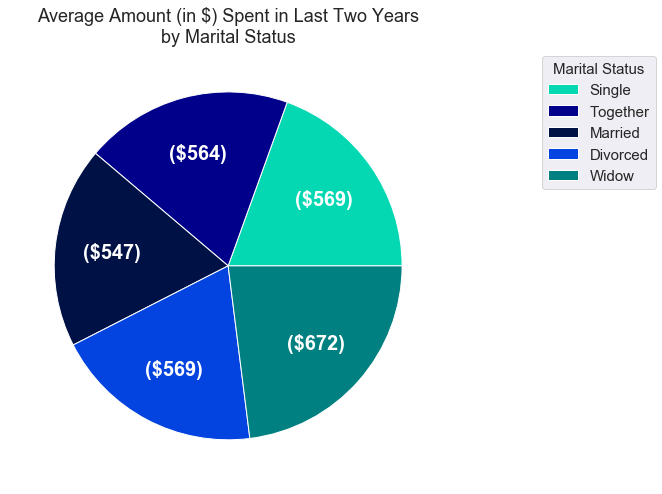

In [43]:
create_pie_plot(data,ind_col = 'Marital_Status', dep_col = 'MntTotal', ind_cols_order = marital_status_order_list, agg_func_name='mean', annotate_percentages=False, is_dollar_value=True, plot_title = 'Average Amount (in $) Spent in Last Two Years\nby Marital Status', legend_title = "Marital Status")

### Amount of Money Customer Spent in Last Two Years for Each Product by Marital Status

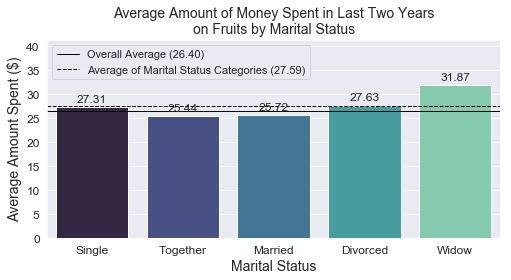

In [44]:
barplot_absolute(dataset=data,dep_col = 'MntFruits',ind_col = 'Marital_Status',hue_col = None, is_aggregated_bool= False, aggregate_func= 'mean', magnitude = None,ind_cols_order = marital_status_order_list, plot_palette = 'mako',plt_figsize_x = 7.2, plt_figsize_y = 4, ymin = 0, y_max_multiplier = 1.3,num_decimals = 2, plot_title_text = 'Average Amount of Money Spent in Last Two Years\non Fruits by Marital Status', plot_title_fsize = 14, xlabel_text = 'Marital Status', xlabel_fsize = 14, ylabel_text = 'Average Amount Spent ($)', ylabel_fsize = 14, x_tick_fsize = 12, y_tick_fsize = 12, xtick_rotation = 0, ytick_rotation = 0, annot_fsize = 12, legend_fsize = 11)

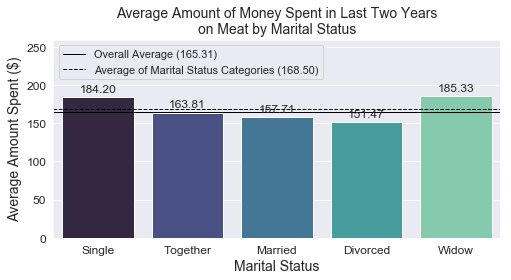

In [45]:
barplot_absolute(dataset=data, dep_col = 'MntMeatProducts',ind_col = 'Marital_Status',hue_col = None, is_aggregated_bool= False, aggregate_func= 'mean', magnitude = None,ind_cols_order = marital_status_order_list, plot_palette = 'mako',plt_figsize_x = 7.2, plt_figsize_y = 4, ymin = 0,y_max_multiplier = 1.4,num_decimals = 2, plot_title_text = 'Average Amount of Money Spent in Last Two Years\non Meat by Marital Status', plot_title_fsize = 14, xlabel_text = 'Marital Status', xlabel_fsize = 14, ylabel_text = 'Average Amount Spent ($)', ylabel_fsize = 14, x_tick_fsize = 12, y_tick_fsize = 12, xtick_rotation = 0, ytick_rotation = 0, annot_fsize = 12, legend_fsize = 11)

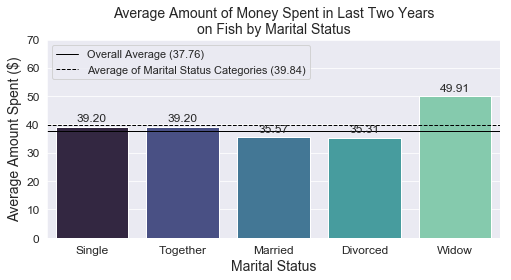

In [46]:
barplot_absolute(dataset=data,dep_col = 'MntFishProducts',ind_col = 'Marital_Status',hue_col = None, is_aggregated_bool= False, aggregate_func= 'mean', magnitude = None,ind_cols_order = marital_status_order_list, plot_palette = 'mako',plt_figsize_x = 7.2, plt_figsize_y = 4, ymin = 0, y_max_multiplier = 1.4,num_decimals = 2, plot_title_text = 'Average Amount of Money Spent in Last Two Years\non Fish by Marital Status', plot_title_fsize = 14, xlabel_text = 'Marital Status', xlabel_fsize = 14, ylabel_text = 'Average Amount Spent ($)', ylabel_fsize = 14, x_tick_fsize = 12, y_tick_fsize = 12, xtick_rotation = 0, ytick_rotation = 0, annot_fsize = 12, legend_fsize = 11)

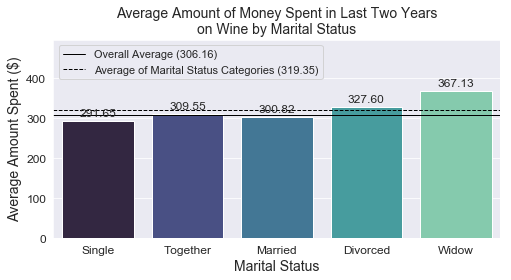

In [47]:
barplot_absolute(dataset=data,dep_col = 'MntWines',ind_col = 'Marital_Status',hue_col = None, is_aggregated_bool= False, aggregate_func= 'mean', magnitude = None,ind_cols_order = marital_status_order_list, plot_palette = 'mako',plt_figsize_x = 7.2, plt_figsize_y = 4, ymin = 0,y_max_multiplier = 1.35,num_decimals = 2, plot_title_text = 'Average Amount of Money Spent in Last Two Years\non Wine by Marital Status', plot_title_fsize = 14, xlabel_text = 'Marital Status', xlabel_fsize = 14, ylabel_text = 'Average Amount Spent ($)', ylabel_fsize = 14, x_tick_fsize = 12, y_tick_fsize = 12, xtick_rotation = 0, ytick_rotation = 0, annot_fsize = 12, legend_fsize = 11)

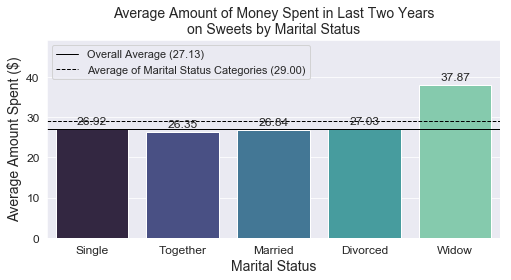

In [48]:
barplot_absolute(dataset=data,dep_col = 'MntSweetProducts',ind_col = 'Marital_Status',hue_col = None, is_aggregated_bool= False, aggregate_func= 'mean', magnitude = None,ind_cols_order = marital_status_order_list, plot_palette = 'mako',plt_figsize_x = 7.2, plt_figsize_y = 4, ymin = 0,y_max_multiplier = 1.3,num_decimals = 2, plot_title_text = 'Average Amount of Money Spent in Last Two Years\non Sweets by Marital Status', plot_title_fsize = 14, xlabel_text = 'Marital Status', xlabel_fsize = 14, ylabel_text = "Average Amount Spent ($)", ylabel_fsize = 14, x_tick_fsize = 12, y_tick_fsize = 12, xtick_rotation = 0, ytick_rotation = 0, annot_fsize = 12, legend_fsize = 11)

## Analyzing chnl sales cols by product 

In [49]:
chnl_sales_cols

['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

In [50]:
data.groupby('Education_Level').mean().reset_index()

,Education_Level,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,AcceptedCmp6,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_Associate,education_Basic,education_Bachelor,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,AcceptedCmpTotal
0,Associate,47625.333333,0.474747,0.409091,48.383838,202.757576,29.626263,136.378788,48.454545,35.055556,47.217172,2.272727,3.787879,2.373737,5.595960,5.469697,0.075758,0.045455,0.050505,0.070707,0.010101,0.015152,3.0,11.0,0.111111,47.207071,2520.111111,0.111111,0.404040,0.176768,0.282828,0.025253,1.0,0.0,0.0,0.0,0.0,452.272727,405.055556,0.252525,0.363636
1,Bachelor,51984.008086,0.441150,0.493261,49.909254,285.804133,30.930818,179.312668,43.523810,31.367475,50.807727,2.314465,4.123989,2.719677,5.854447,5.292902,0.070081,0.070979,0.077269,0.071878,0.014376,0.012579,3.0,11.0,0.136568,50.381851,2518.674753,0.106020,0.385445,0.222821,0.254268,0.031447,0.0,0.0,1.0,0.0,0.0,570.938904,520.131177,0.304582,0.441150
2,Basic,20306.259259,0.629630,0.092593,48.444444,7.240741,11.111111,11.444444,17.055556,12.111111,22.833333,1.796296,1.888889,0.481481,2.851852,6.870370,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.037037,42.537037,2587.203704,0.018519,0.370370,0.333333,0.259259,0.018519,0.0,1.0,0.0,0.0,0.0,58.962963,36.129630,0.111111,0.148148
3,Master,52629.579670,0.456044,0.535714,47.346154,333.788462,21.431319,163.343407,31.574176,20.865385,40.277473,2.431319,4.043956,2.552198,5.901099,5.217033,0.065934,0.085165,0.074176,0.049451,0.005495,0.005495,3.0,11.0,0.153846,53.063187,2497.571429,0.101648,0.379121,0.211538,0.277473,0.030220,0.0,0.0,0.0,1.0,0.0,571.002747,530.725275,0.280220,0.434066
4,PhD,55220.581933,0.399160,0.602941,48.500000,409.573529,20.012605,163.571429,26.897059,20.411765,32.256303,2.319328,4.470588,2.901261,6.123950,5.302521,0.084034,0.094538,0.079832,0.063025,0.021008,0.002101,3.0,11.0,0.212185,53.848739,2498.848739,0.109244,0.392857,0.207983,0.239496,0.050420,0.0,0.0,0.0,0.0,1.0,640.466387,608.210084,0.342437,0.554622


### First, I am going to create a 'NumTotalPurchases' which will be a summation of the three purchase channel columns ('NumWebPurchases','NumCatalogPurchases','NumStorePurchases')

In [51]:
data['NumTotalPurchases'] = data[chnl_sales_cols].apply(lambda cols: sum(cols),axis = 1)

In [52]:
data[chnl_sales_cols + ['NumTotalPurchases']].describe()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumTotalPurchases
count,2205.000000,2205.000000,2205.000000,2205.000000
mean,4.100680,2.645351,5.823583,12.569615
std,2.737424,2.798647,3.241796,7.180350
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,6.000000
50%,4.000000,2.000000,5.000000,12.000000
75%,6.000000,4.000000,8.000000,18.000000
max,27.000000,28.000000,13.000000,32.000000


### Now, I am going to create three more columns which contain the ratio of each column in ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'] / 'NumTotalPurchases

In [53]:
for col in chnl_sales_cols:
    data["Percent%s" % col[3:]] = data[[col,'NumTotalPurchases']].apply(lambda cols: np.round(100*(cols[0] / cols[1]),2) if cols[1] != 0 else 0, axis = 1)

In [54]:
data.head(1)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,AcceptedCmp6,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_Associate,education_Basic,education_Bachelor,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,AcceptedCmpTotal,Education_Level,Marital_Status,NumTotalPurchases,PercentWebPurchases,PercentCatalogPurchases,PercentStorePurchases
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0,1,Bachelor,Single,22,36.36,45.45,18.18


In [55]:
perc_chnl_cols = [col for col in data.columns if col[:7] == 'Percent']

In [56]:
perc_chnl_cols

['PercentWebPurchases', 'PercentCatalogPurchases', 'PercentStorePurchases']

In [57]:
data.groupby('Education_Level').mean()[perc_chnl_cols]

,PercentWebPurchases,PercentCatalogPurchases,PercentStorePurchases
Education_Level,,,
Associate,31.867071,14.729798,53.402980
Bachelor,32.908203,16.718922,50.103154
Basic,33.988519,7.795000,58.216667
Master,33.072747,16.491099,50.435907
PhD,33.358718,17.217647,49.213277


## Segmenting Number of Purchases from Different Channels by Education Level

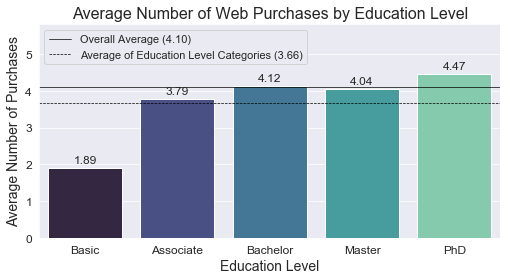

In [58]:
barplot_absolute(data,dep_col = 'NumWebPurchases',ind_col = 'Education_Level', plot_title_text = 'Average Number of Web Purchases by Education Level',hue_col = None, is_aggregated_bool= False, aggregate_func= 'mean', magnitude = None,ind_cols_order = education_level_order_list, plot_palette = 'mako',plt_figsize_x = 7.2, plt_figsize_y = 4, ymin = 0,y_max_multiplier = 1.3,num_decimals = 2, plot_title_fsize = 16, xlabel_text = 'Education Level', xlabel_fsize = 14, ylabel_text = 'Average Number of Purchases', ylabel_fsize = 14, x_tick_fsize = 12, y_tick_fsize = 12, xtick_rotation = 0, ytick_rotation = 0, annot_fsize = 12, legend_fsize = 11,hlinewidth=0.7)

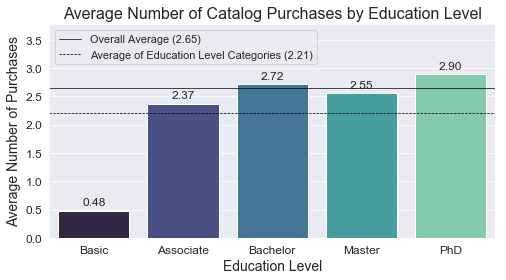

In [59]:
barplot_absolute(data,dep_col = 'NumCatalogPurchases',ind_col = 'Education_Level', plot_title_text = 'Average Number of Catalog Purchases by Education Level',hue_col = None, is_aggregated_bool= False, aggregate_func= 'mean', magnitude = None,ind_cols_order = education_level_order_list, plot_palette = 'mako',plt_figsize_x = 7.2, plt_figsize_y = 4, ymin = 0,y_max_multiplier = 1.3,num_decimals = 2, plot_title_fsize = 16, xlabel_text = 'Education Level', xlabel_fsize = 14, ylabel_text = 'Average Number of Purchases', ylabel_fsize = 14, x_tick_fsize = 12, y_tick_fsize = 12, xtick_rotation = 0, ytick_rotation = 0, annot_fsize = 12, legend_fsize = 11,hlinewidth=0.7)

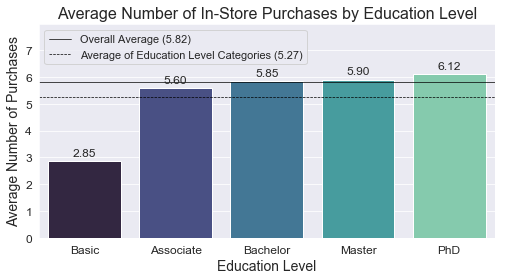

In [60]:
barplot_absolute(data,dep_col = 'NumStorePurchases',ind_col = 'Education_Level', plot_title_text = 'Average Number of In-Store Purchases by Education Level',hue_col = None, is_aggregated_bool= False, aggregate_func= 'mean', magnitude = None,ind_cols_order = education_level_order_list, plot_palette = 'mako',plt_figsize_x = 7.2, plt_figsize_y = 4, ymin = 0,y_max_multiplier = 1.3,num_decimals = 2, plot_title_fsize = 16, xlabel_text = 'Education Level', xlabel_fsize = 14, ylabel_text = 'Average Number of Purchases', ylabel_fsize = 14, x_tick_fsize = 12, y_tick_fsize = 12, xtick_rotation = 0, ytick_rotation = 0, annot_fsize = 12, legend_fsize = 11,hlinewidth=0.7)

### Ratio of Purcheses for Different Channels by Education Level

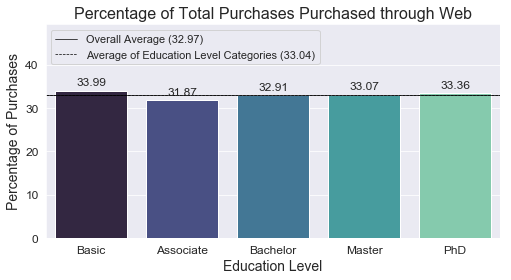

In [61]:
barplot_absolute(data,dep_col = 'PercentWebPurchases',ind_col = 'Education_Level', plot_title_text = 'Percentage of Total Purchases Purchased through Web',hue_col = None, is_aggregated_bool= False, aggregate_func= 'mean', magnitude = None,ind_cols_order = education_level_order_list, plot_palette = 'mako',plt_figsize_x = 7.2, plt_figsize_y = 4, ymin = 0,y_max_multiplier = 1.45,num_decimals = 2, plot_title_fsize = 16, xlabel_text = 'Education Level', xlabel_fsize = 14, ylabel_text = 'Percentage of Purchases', ylabel_fsize = 14, x_tick_fsize = 12, y_tick_fsize = 12, xtick_rotation = 0, ytick_rotation = 0, annot_fsize = 12, legend_fsize = 11,hlinewidth=0.7)

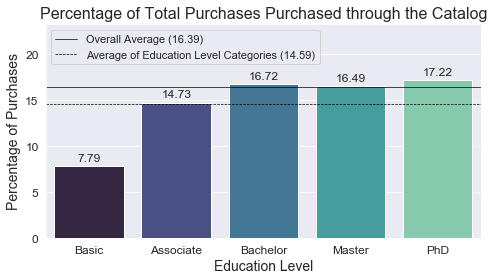

In [62]:
barplot_absolute(data,dep_col = 'PercentCatalogPurchases',ind_col = 'Education_Level', plot_title_text = 'Percentage of Total Purchases Purchased through the Catalog',hue_col = None, is_aggregated_bool= False, aggregate_func= 'mean', magnitude = None,ind_cols_order = education_level_order_list, plot_palette = 'mako',plt_figsize_x = 7.2, plt_figsize_y = 4, ymin = 0,y_max_multiplier = 1.35,num_decimals = 2, plot_title_fsize = 16, xlabel_text = 'Education Level', xlabel_fsize = 14, ylabel_text = 'Percentage of Purchases', ylabel_fsize = 14, x_tick_fsize = 12, y_tick_fsize = 12, xtick_rotation = 0, ytick_rotation = 0, annot_fsize = 12, legend_fsize = 11,hlinewidth=0.7)

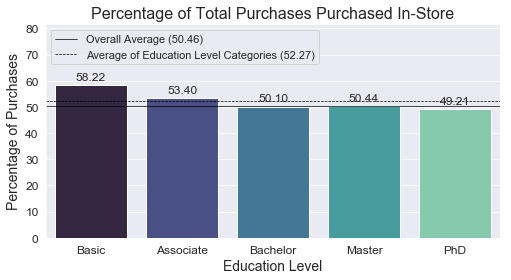

In [63]:
barplot_absolute(data,dep_col = 'PercentStorePurchases',ind_col = 'Education_Level', plot_title_text = 'Percentage of Total Purchases Purchased In-Store',hue_col = None, is_aggregated_bool= False, aggregate_func= 'mean', magnitude = None,ind_cols_order = education_level_order_list, plot_palette = 'mako',plt_figsize_x = 7.2, plt_figsize_y = 4, ymin = 0,y_max_multiplier = 1.4, num_decimals = 2, plot_title_fsize = 16, xlabel_text = 'Education Level', xlabel_fsize = 14, ylabel_text = 'Percentage of Purchases', ylabel_fsize = 14, x_tick_fsize = 12, y_tick_fsize = 12, xtick_rotation = 0, ytick_rotation = 0, annot_fsize = 12, legend_fsize = 11,hlinewidth=0.7)

## Segmenting Number of Purchases from Different Channels by Marital Status

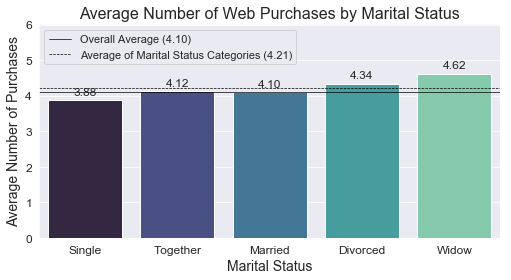

In [64]:
barplot_absolute(data,dep_col = 'NumWebPurchases',ind_col = 'Marital_Status', plot_title_text = 'Average Number of Web Purchases by Marital Status',hue_col = None, is_aggregated_bool= False, aggregate_func= 'mean', magnitude = None,ind_cols_order = marital_status_order_list, plot_palette = 'mako',plt_figsize_x = 7.2, plt_figsize_y = 4, ymin = 0,y_max_multiplier = 1.3,num_decimals = 2, plot_title_fsize = 16, xlabel_text = 'Marital Status', xlabel_fsize = 14, ylabel_text = 'Average Number of Purchases', ylabel_fsize = 14, x_tick_fsize = 12, y_tick_fsize = 12, xtick_rotation = 0, ytick_rotation = 0, annot_fsize = 12, legend_fsize = 11,hlinewidth=0.7)

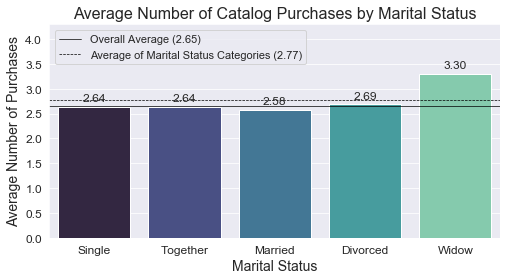

In [65]:
barplot_absolute(data,dep_col = 'NumCatalogPurchases',ind_col = 'Marital_Status', plot_title_text = 'Average Number of Catalog Purchases by Marital Status',hue_col = None, is_aggregated_bool= False, aggregate_func= 'mean', magnitude = None,ind_cols_order = marital_status_order_list, plot_palette = 'mako',plt_figsize_x = 7.2, plt_figsize_y = 4, ymin = 0,y_max_multiplier = 1.3,num_decimals = 2, plot_title_fsize = 16, xlabel_text = 'Marital Status', xlabel_fsize = 14, ylabel_text = 'Average Number of Purchases', ylabel_fsize = 14, x_tick_fsize = 12, y_tick_fsize = 12, xtick_rotation = 0, ytick_rotation = 0, annot_fsize = 12, legend_fsize = 11,hlinewidth=0.7)

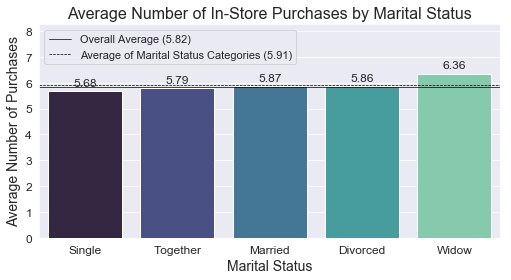

In [66]:
barplot_absolute(data,dep_col = 'NumStorePurchases',ind_col = 'Marital_Status', plot_title_text = 'Average Number of In-Store Purchases by Marital Status',hue_col = None, is_aggregated_bool= False, aggregate_func= 'mean', magnitude = None,ind_cols_order = marital_status_order_list, plot_palette = 'mako',plt_figsize_x = 7.2, plt_figsize_y = 4, ymin = 0,y_max_multiplier = 1.3,num_decimals = 2, plot_title_fsize = 16, xlabel_text = 'Marital Status', xlabel_fsize = 14, ylabel_text = 'Average Number of Purchases', ylabel_fsize = 14, x_tick_fsize = 12, y_tick_fsize = 12, xtick_rotation = 0, ytick_rotation = 0, annot_fsize = 12, legend_fsize = 11,hlinewidth=0.7)

### Ratio of Purcheses for Different Channels by Education Level

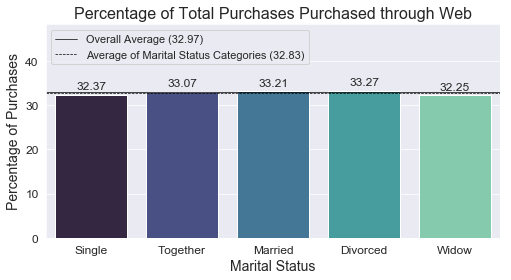

In [67]:
barplot_absolute(data,dep_col = 'PercentWebPurchases',ind_col = 'Marital_Status', plot_title_text = 'Percentage of Total Purchases Purchased through Web',hue_col = None, is_aggregated_bool= False, aggregate_func= 'mean', magnitude = None,ind_cols_order = marital_status_order_list, plot_palette = 'mako',plt_figsize_x = 7.2, plt_figsize_y = 4, ymin = 0,y_max_multiplier = 1.45,num_decimals = 2, plot_title_fsize = 16, xlabel_text = 'Marital Status', xlabel_fsize = 14, ylabel_text = 'Percentage of Purchases', ylabel_fsize = 14, x_tick_fsize = 12, y_tick_fsize = 12, xtick_rotation = 0, ytick_rotation = 0, annot_fsize = 12, legend_fsize = 11,hlinewidth=0.7)

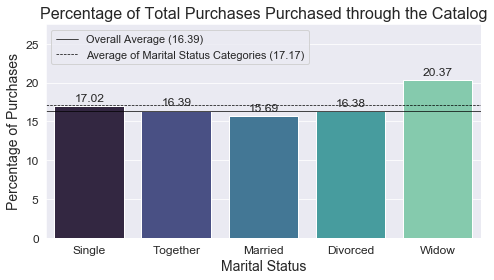

In [68]:
barplot_absolute(data,dep_col = 'PercentCatalogPurchases',ind_col = 'Marital_Status', plot_title_text = 'Percentage of Total Purchases Purchased through the Catalog',hue_col = None, is_aggregated_bool= False, aggregate_func= 'mean', magnitude = None,ind_cols_order = marital_status_order_list, plot_palette = 'mako',plt_figsize_x = 7.2, plt_figsize_y = 4, ymin = 0,y_max_multiplier = 1.35,num_decimals = 2, plot_title_fsize = 16, xlabel_text = 'Marital Status', xlabel_fsize = 14, ylabel_text = 'Percentage of Purchases', ylabel_fsize = 14, x_tick_fsize = 12, y_tick_fsize = 12, xtick_rotation = 0, ytick_rotation = 0, annot_fsize = 12, legend_fsize = 11,hlinewidth=0.7)

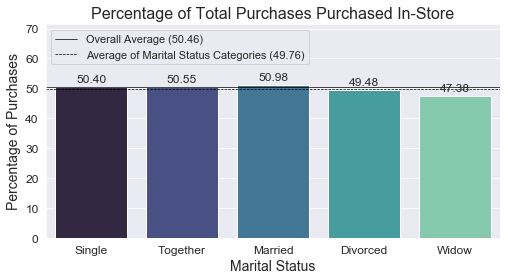

In [69]:
barplot_absolute(data,dep_col = 'PercentStorePurchases',ind_col = 'Marital_Status', plot_title_text = 'Percentage of Total Purchases Purchased In-Store',hue_col = None, is_aggregated_bool= False, aggregate_func= 'mean', magnitude = None,ind_cols_order = marital_status_order_list, plot_palette = 'mako',plt_figsize_x = 7.2, plt_figsize_y = 4, ymin = 0,y_max_multiplier = 1.4, num_decimals = 2, plot_title_fsize = 16, xlabel_text = 'Marital Status', xlabel_fsize = 14, ylabel_text = 'Percentage of Purchases', ylabel_fsize = 14, x_tick_fsize = 12, y_tick_fsize = 12, xtick_rotation = 0, ytick_rotation = 0, annot_fsize = 12, legend_fsize = 11,hlinewidth=0.7)

In [70]:
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,AcceptedCmp6,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_Associate,education_Basic,education_Bachelor,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,AcceptedCmpTotal,Education_Level,Marital_Status,NumTotalPurchases,PercentWebPurchases,PercentCatalogPurchases,PercentStorePurchases
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0,1,Bachelor,Single,22,36.36,45.45,18.18
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0,0,Bachelor,Single,4,25.00,25.00,50.00
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0,0,Bachelor,Together,20,40.00,10.00,50.00
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0,0,Bachelor,Together,6,33.33,0.00,66.67
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0,0,PhD,Married,14,35.71,21.43,42.86


## Operating Expense Ratio (OER): OER = Cost / Revenue (Good amount for ratio of entire operating cost to resultant revenue is 60% to 80%)

In [71]:
data['OER'] = data['Z_CostContact'] / data['Z_Revenue']

In [72]:
data['OER'].describe()

count    2.205000e+03
mean     2.727273e-01
std      1.082713e-14
min      2.727273e-01
25%      2.727273e-01
50%      2.727273e-01
75%      2.727273e-01
max      2.727273e-01
Name: OER, dtype: float64

### There is no variation in costs and revenue per contact, so I cannot analyze trends when it comes to costs, revenues, and OER

# Campaign Analysis

## Campaign 1

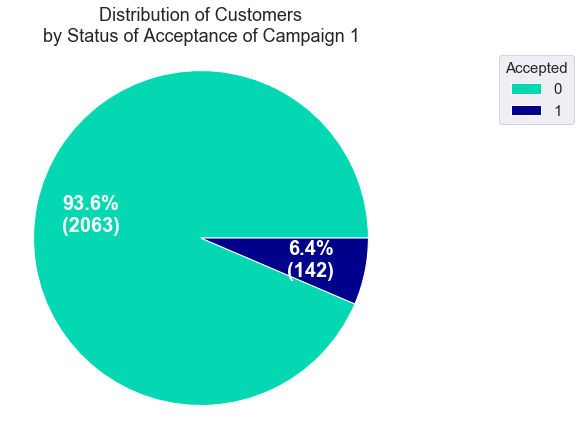

In [73]:
camp_num = 1
create_pie_plot(pd.DataFrame(data['AcceptedCmp%s' % camp_num].value_counts()).reset_index(),ind_col = 'index', dep_col = 'AcceptedCmp%s' % camp_num, agg_func_name='mean', annotate_percentages=True, plot_title = 'Distribution of Customers\nby Status of Acceptance of Campaign %s' % camp_num, plt_figsize_x=7, plt_figsize_y=7, pie_radius = 1.1, legend_title = "Accepted")

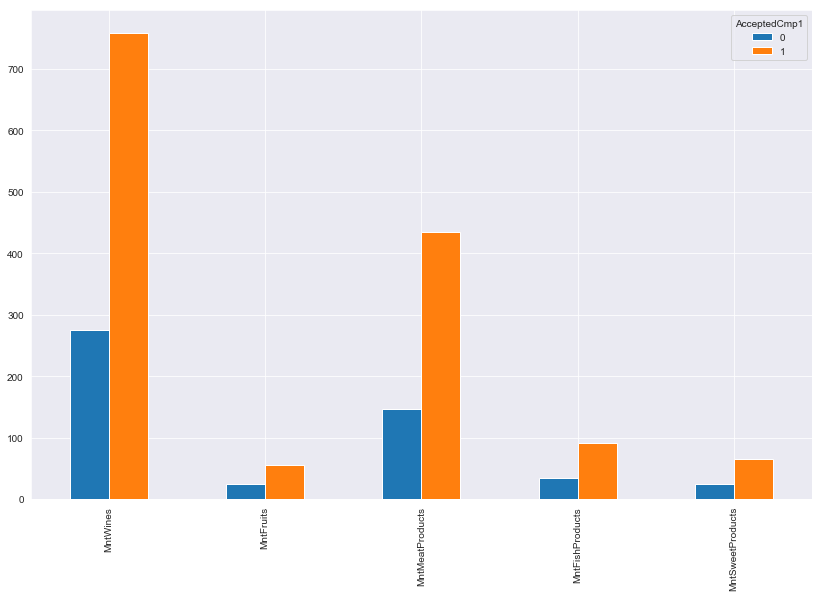

In [74]:
data.groupby('AcceptedCmp%s' % camp_num).mean()[product_cols].transpose().plot(kind = 'bar')

In [75]:
#barplot_absolute(data.groupby('AcceptedCmp%s' % camp_num).mean()[product_cols].transpose().reset_index(),dep_col = [0,1],plot_category_avg_line_bool=False,ind_col = 'index', plot_title_text = 'Average Income by Success of Campaign %s' % camp_num,hue_col = None, is_aggregated_bool= False, aggregate_func= 'mean', magnitude = None,ind_cols_order = [0,1], plot_palette = 'mako',plt_figsize_x = 6, plt_figsize_y = 4, ymin = 0,y_max_multiplier = 1.4, num_decimals = 1, plot_title_fsize = 16, xlabel_text = 'Success Status of Campaign %s' % camp_num, xlabel_fsize = 14, ylabel_text = 'Average Income', ylabel_fsize = 14, x_tick_fsize = 12, y_tick_fsize = 12, xtick_rotation = 0, ytick_rotation = 0, annot_fsize = 12, legend_fsize = 11,hlinewidth=0.7)

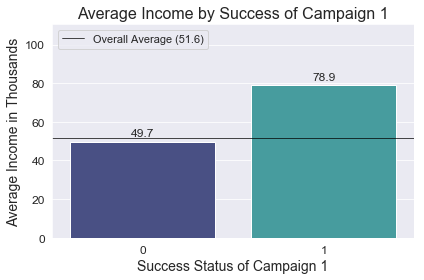

In [76]:
barplot_absolute(data,dep_col = 'Income',plot_category_avg_line_bool=False,ind_col = 'AcceptedCmp%s' % camp_num, plot_title_text = 'Average Income by Success of Campaign %s' % camp_num,hue_col = None, is_aggregated_bool= False, aggregate_func= 'mean', magnitude = None,ind_cols_order = [0,1], plot_palette = 'mako',plt_figsize_x = 6, plt_figsize_y = 4, ymin = 0,y_max_multiplier = 1.4, num_decimals = 1, plot_title_fsize = 16, xlabel_text = 'Success Status of Campaign %s' % camp_num, xlabel_fsize = 14, ylabel_text = 'Average Income', ylabel_fsize = 14, x_tick_fsize = 12, y_tick_fsize = 12, xtick_rotation = 0, ytick_rotation = 0, annot_fsize = 12, legend_fsize = 11,hlinewidth=0.7)

In [77]:
data.groupby('AcceptedCmp1').mean()['Income']

AcceptedCmp1
0    49746.391663
1    78872.626761
Name: Income, dtype: float64

In [78]:
data.groupby('AcceptedCmp2').mean()['Income']

AcceptedCmp2
0    51354.057011
1    71054.833333
Name: Income, dtype: float64

In [79]:
data.groupby('AcceptedCmp3').mean()['Income']

AcceptedCmp3
0    51687.511263
1    50802.582822
Name: Income, dtype: float64

In [80]:
data.groupby('AcceptedCmp4').mean()['Income']

AcceptedCmp4
0    50252.792259
1    68663.231707
Name: Income, dtype: float64

In [81]:
data.groupby('AcceptedCmp5').mean()['Income']

AcceptedCmp5
0    49202.100294
1    82345.503106
Name: Income, dtype: float64

In [82]:
data.groupby('AcceptedCmp6').mean()['Income']

AcceptedCmp6
0    50094.496261
1    60209.675676
Name: Income, dtype: float64

# Next Steps